> **ALGORITMO DE MACHINE LEARNING: SUPPORT VECTOR MACHINE**
---

Aplicación del algoritmo de Support Vector Machine Regressor para obtener el valor de la ganancia de retroalimentación de la velocidad angular del motor en base a la inercia total sumado de la inercia del motor y la carga.

In [ ]:
!pip list | grep scikit-learn

scikit-learn                  0.24.2


In [ ]:
 !pip install scikit-learn==0.24.2

In [ ]:
!pip list | grep scikit-learn

scikit-learn                  0.24.2


> Importación y Análisis de Data
---

In [ ]:
#IMPORTAR LIBRERÍA
import pandas as pd                                     # LIBRERÍA PARA DATAFRAMES
import numpy as np                                      # LIBRERÍA PARA MATRICES
import os                                               # LIBRERÍA PARA OPERACIONES CON EL SISTEMA OPERATIVO
import matplotlib.pyplot as plt                         # LIBRERÍA PARA GRÁFICAS 2D
from sklearn import model_selection                     # LIBRERÍA PARA SEPARAR DATA EN ENTRENAMIENTO Y VALIDACIÓN
from sklearn.svm import SVR                             # LIBRERÍA PARA IMPLEMENTAR LA REGRESIÓN POR SUPPORT VECTOR MACHINE
from sklearn.model_selection import KFold               # LIBRERÍA PARA DIVIDIR LA DATA EN N-FOLD O SUBCONJUNTOS DE TESTING DIFERENTES
from sklearn.model_selection import cross_val_score     # LIBRERÍA PARA OBTENER LA CORRELACIÓN POR VALIDACIÓN CRUZADA
from sklearn.metrics import mean_squared_error          # LIBRERÍA PARA HALLAR EL ERROR CUADRÁTICO MEDIO
import joblib                                           # LIBRERÍA PARA EXPORTAR MODELO DE MACHINE LEARNING

from google.colab import drive          # LIBRERÍA PARA IMPORTAR DESDE GOOGLE DRIVE

In [ ]:
%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#LEER ARCHIVO EXCEL (.xlsx)
mainpath = "drive/My Drive/DATASET"
filenameDatos = "PP_CONTROL_MOTOR_DC/Dataset_Motor.xlsx"
fullpathDatos = os.path.join(mainpath,filenameDatos)

data = pd.read_excel(fullpathDatos)

#Mostrar Datos
data

,Inercia_Total,Ganancia_Corriente,Ganancia_Velocidad
0,0.023718,0.107391,17.512910
1,0.023765,0.107391,17.549938
2,0.023812,0.107391,17.586966
3,0.023859,0.107391,17.623995
4,0.023907,0.107391,17.661023
...,...,...,...
1995,0.117811,2.026651,27828.389339
1996,0.117859,1.415655,13640.427254
1997,0.117906,2.026651,27850.673436
1998,0.117953,2.026651,27861.815484


In [ ]:
data = data[data["Inercia_Total"] <= 0.08]
data

,Inercia_Total,Ganancia_Corriente,Ganancia_Velocidad
0,0.023718,0.107391,17.512910
1,0.023765,0.107391,17.549938
2,0.023812,0.107391,17.586966
3,0.023859,0.107391,17.623995
4,0.023907,0.107391,17.661023
...,...,...,...
1189,0.079797,0.229605,259.688392
1190,0.079844,0.229605,259.842612
1191,0.079891,0.229605,259.996832
1192,0.079938,0.229605,260.151053


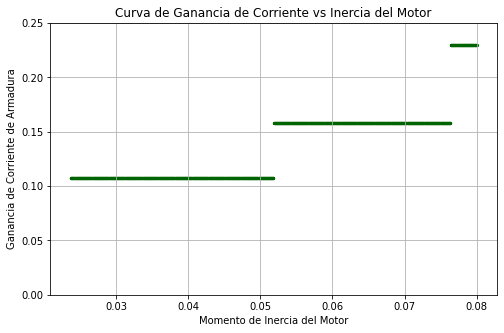

In [ ]:
#GRÁFICA DE LA GANANCIA DE LA CORRIENTE VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.scatter(data.Inercia_Total, data.Ganancia_Corriente, c = "darkgreen", s = 5)
plt.ylim([0,0.25])
plt.title("Curva de Ganancia de Corriente vs Inercia del Motor")
plt.xlabel("Momento de Inercia del Motor")
plt.ylabel("Ganancia de Corriente de Armadura")
plt.grid()
plt.show()

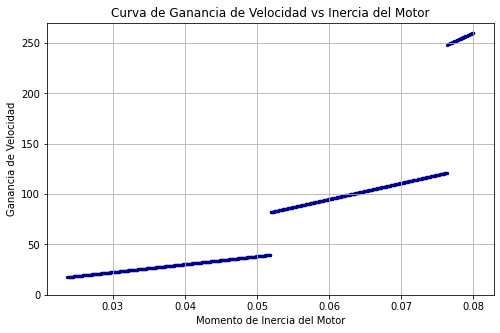

In [ ]:
#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.scatter(data.Inercia_Total, data.Ganancia_Velocidad, c = "darkblue", s = 5)
plt.ylim([0,270])
plt.title("Curva de Ganancia de Velocidad vs Inercia del Motor")
plt.xlabel("Momento de Inercia del Motor")
plt.ylabel("Ganancia de Velocidad")
plt.grid()
plt.show()

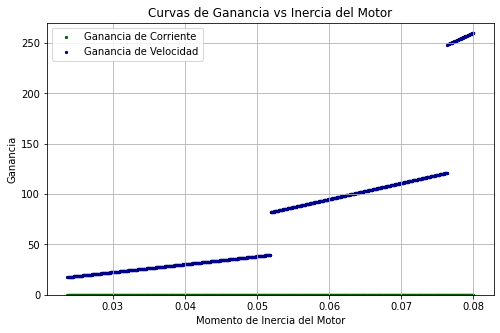

In [ ]:
#GRÁFICA DE LA GANANCIA VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.scatter(data.Inercia_Total, data.Ganancia_Corriente, c = "darkgreen", label = "Ganancia de Corriente", s = 5)
plt.scatter(data.Inercia_Total, data.Ganancia_Velocidad, c = "darkblue", label = "Ganancia de Velocidad", s = 5)
plt.ylim([0,270])
plt.title("Curvas de Ganancia vs Inercia del Motor")
plt.xlabel("Momento de Inercia del Motor")
plt.ylabel("Ganancia")
plt.grid()
plt.legend()
plt.show()

> # 1. GANANCIA VELOCIDAD



> Separar Datos en Conjuntos de Entrenamiento y Validación
---

In [ ]:
#OBTENER LA VARIABLE CARACTERÍSTICA Y LA VARIABLE OBJETIVO DEL DATASET
caracteristica = ["Inercia_Total"]
objetivo = ["Ganancia_Velocidad"]

X = data[caracteristica]
Y = data[objetivo]

In [ ]:
#OBTENEMOS DATOS DE ENTRENAMIENTO Y VALIDACIÓN (75% DE DATOS PARA EL CONJUNTO DE ENTRENAMIENTO)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.25, random_state = 0)

> Entrenamiento del SVR y Validación de sus Parámetros
---

Las variable predictora es:  Inercia_Total


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un HIPERPARÁMETRO C de  1  el mse es:  4529.392169248753


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un HIPERPARÁMETRO C de  10001  el mse es:  1093.1538211569316


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un HIPERPARÁMETRO C de  20001  el mse es:  1090.7433621548787


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un HIPERPARÁMETRO C de  30001  el mse es:  1090.0587377207364


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un HIPERPARÁMETRO C de  40001  el mse es:  1089.8949305239662


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un HIPERPARÁMETRO C de  50001  el mse es:  1089.4209062314872


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un HIPERPARÁMETRO C de  60001  el mse es:  1089.366561534195


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un HIPERPARÁMETRO C de  70001  el mse es:  1089.1710815997856


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un HIPERPARÁMETRO C de  80001  el mse es:  1089.1710271078114


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un HIPERPARÁMETRO C de  90001  el mse es:  1089.1709725339442


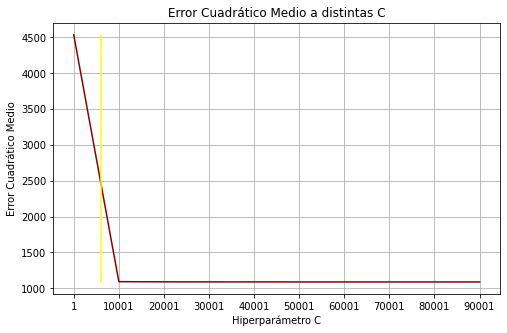

In [ ]:
#VALIDACIÓN CRUZADA PARA KERNEL LINEAL A DISTINTOS HIPERPARÁMETROS C

print("Las variable predictora es: ", caracteristica[0])

# PRUEBA DEL HIPERPARÁMETRO C
cMinimo = 1
cMaximo = 100000+1
cPaso = 10000

errorCuadraticoMedioList = []
cs = np.array(range(cMinimo,cMaximo,cPaso))

for c in range(cMinimo,cMaximo,cPaso):
  svr = SVR(kernel = "linear", C = c) 
  svr.fit(X_train,Y_train)
  
  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 150 EN 150, PUES TENEMOS 1500 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(svr, X, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para un HIPERPARÁMETRO C de ", c, " el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(cs, errorCuadraticoMedio, c = "darkred")
plt.plot(6000*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintas C")
plt.xlabel("Hiperparámetro C")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(cs)
plt.grid()
plt.show()

Las variable predictora es:  Inercia_Total


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  1  el mse es:  870.7891874810696


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  101  el mse es:  870.4918641308234


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  201  el mse es:  870.6102442272897


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  301  el mse es:  870.7576277984277


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  401  el mse es:  870.8182277799264


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  501  el mse es:  870.824940872191


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  601  el mse es:  870.8875625432656


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  701  el mse es:  870.9450709069324


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  801  el mse es:  871.0002425009923


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  901  el mse es:  871.0980930906622


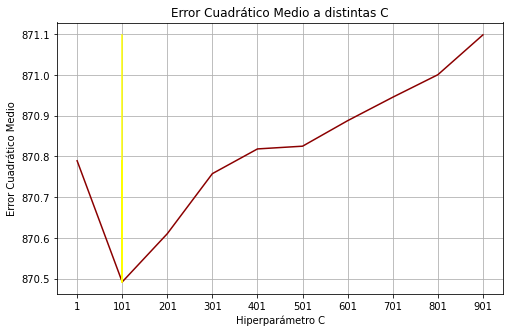

In [ ]:
#VALIDACIÓN CRUZADA PARA KERNEL POLINOMIAL A DISTINTOS HIPERPARÁMETROS C

print("Las variable predictora es: ", caracteristica[0])

# PRUEBA DEL HIPERPARÁMETRO C
cMinimo = 1
cMaximo = 1000+1
cPaso = 100

errorCuadraticoMedioList = []
cs = np.array(range(cMinimo,cMaximo,cPaso))

for c in range(cMinimo,cMaximo,cPaso):
  svr = SVR(kernel = "poly", C = c, degree = 2) 
  svr.fit(X_train,Y_train)
  
  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 150 EN 150, PUES TENEMOS 1500 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(svr, X, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para un hiperparámetro C de ", c, " el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(cs, errorCuadraticoMedio, c = "darkred")
plt.plot(100*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintas C")
plt.xlabel("Hiperparámetro C")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(cs)
plt.grid()
plt.show()

Las variable predictora es:  Inercia_Total


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para el polinomio de grado  2  el mse es:  870.4913017704066


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para el polinomio de grado  3  el mse es:  684.0506490194813


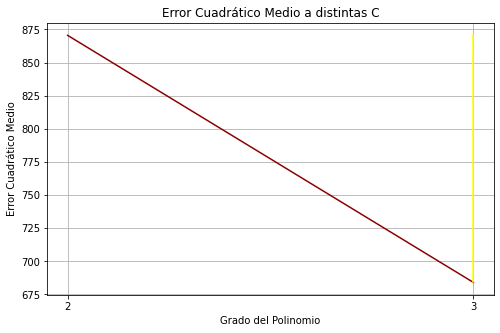

In [ ]:
#VALIDACIÓN CRUZADA PARA KERNEL POLINOMIAL A DISTINTOS GRADOS DEL POLINOMIO

print("Las variable predictora es: ", caracteristica[0])

cAceptado = 100

# PRUEBA DEL HIPERPARÁMETRO C
dMinimo = 2
dMaximo = 3+1
dPaso = 1

errorCuadraticoMedioList = []
ds = np.array(range(dMinimo,dMaximo,dPaso))

for d in range(dMinimo,dMaximo,dPaso):
  svr = SVR(kernel = "poly", C = cAceptado, degree = d) 
  svr.fit(X_train,Y_train)
  
  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 150 EN 150, PUES TENEMOS 1500 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(svr, X, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para el polinomio de grado ", d, " el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(ds, errorCuadraticoMedio, c = "darkred")
plt.plot(3*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintas C")
plt.xlabel("Grado del Polinomio")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(ds)
plt.grid()
plt.show()

Las variable predictora es:  Inercia_Total


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  1  el mse es:  4550.174650744219


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  101  el mse es:  4053.5512543638856


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  201  el mse es:  3604.1676349340887


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  301  el mse es:  3047.954913410551


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  401  el mse es:  2357.3269540081074


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  501  el mse es:  1820.5339832755603


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  601  el mse es:  1436.1714012639852


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  701  el mse es:  1272.2577553956921


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  801  el mse es:  1257.4402310227995


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  901  el mse es:  1245.2976366885925


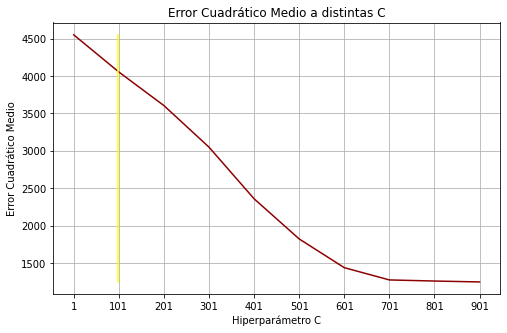

In [ ]:
#VALIDACIÓN CRUZADA PARA KERNEL RBF A DISTINTOS HIPERPARÁMETROS C

print("Las variable predictora es: ", caracteristica[0])

# PRUEBA DEL HIPERPARÁMETRO C
cMinimo = 1
cMaximo = 1000+1
cPaso = 100

errorCuadraticoMedioList = []
cs = np.array(range(cMinimo,cMaximo,cPaso))

for c in range(cMinimo,cMaximo,cPaso):
  svr = SVR(kernel = "rbf", C = c, gamma = 0.1) 
  svr.fit(X_train,Y_train)
  
  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 150 EN 150, PUES TENEMOS 1500 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(svr, X, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para un hiperparámetro C de ", c, " el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(cs, errorCuadraticoMedio, c = "darkred")
plt.plot(100*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintas C")
plt.xlabel("Hiperparámetro C")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(cs)
plt.grid()
plt.show()

In [ ]:
kernelAceptado = "poly"
cAceptado = 100
degreeAceptado = 3

In [ ]:
svr = SVR(kernel = kernelAceptado, C = cAceptado, degree = degreeAceptado) 
svr.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=100, kernel='poly')

> Validación del SVR
---

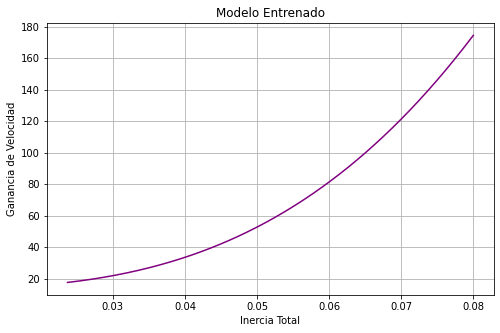

In [ ]:
Y_predtotal = svr.predict(X)
#GRÁFICA DEL MODELO
plt.figure(figsize = (8,5))
plt.plot(X, Y_predtotal, c = "purple")
plt.title("Modelo Entrenado")
plt.xlabel("Inercia Total")
plt.ylabel("Ganancia de Velocidad")
plt.grid()
plt.show()

In [ ]:
# ERROR CUADRÁTICO MEDIO
Y_pred = svr.predict(X_test)
MSE = mean_squared_error(Y_test,Y_pred)

# COEFICIENTES DE DETERMINACIÓN R2 SCORE
OOBS = svr.score(X_test,Y_test)
OOBS = OOBS*100

# ERROR ESTÁNDAR RESIDUAL
SSD = np.sum((Y_pred - np.transpose(Y_test.values))**2) #SSD         #DIFERENCIA CUADRADO ENTRE LOS DATOS Y EL RESULTADO PREDICHO
RSE_prev = np.sqrt(SSD/(len(Y_test.values)-len(caracteristica)-1))   #HALLAR ERROR RESPECTO AL PROMEDIO
promedio = np.mean(Y_test.values)
RSE = RSE_prev/promedio

print("El error cuadrático medio es: ", MSE)
print("El coeficiente de Determinación R2 score es: ", OOBS, "%")
print("El error estándar residual es: ", RSE)

El error cuadrático medio es:  807.1455133907406
El coeficiente de Determinación R2 score es:  79.66474921910235 %
El error estándar residual es:  0.35844136844152824


> Exportar Modelo de SVR
---

In [ ]:
filenameModelo = "PP_CONTROL_MOTOR_DC/Motor_Regresion_SVM_Velocidad.pkl"
fullpathModelo = os.path.join(mainpath,filenameModelo)

joblib.dump(svr,fullpathModelo)

['drive/My Drive/DATASET/PP_CONTROL_MOTOR_DC/Motor_Regresion_SVM_Velocidad.pkl']

> # 2. GANANCIA CORRIENTE


In [ ]:
#OBTENER LA VARIABLE CARACTERÍSTICA Y LA VARIABLE OBJETIVO DEL DATASET
caracteristica = ["Inercia_Total"]
objetivo = ["Ganancia_Corriente"]

X = data[caracteristica]
Y = data[objetivo]

In [ ]:
#OBTENEMOS DATOS DE ENTRENAMIENTO Y VALIDACIÓN (75% DE DATOS PARA EL CONJUNTO DE ENTRENAMIENTO)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.25, random_state = 0)

> Entrenamiento del SVR y Validación de sus Parámetros
---

Las variable predictora es:  Inercia_Total
Para un HIPERPARÁMETRO C de  1  el mse es:  0.0021579473623986527
Para un HIPERPARÁMETRO C de  2  el mse es:  0.0021579473623986527


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un HIPERPARÁMETRO C de  3  el mse es:  0.0021579473623986527
Para un HIPERPARÁMETRO C de  4  el mse es:  0.0021579473623986527
Para un HIPERPARÁMETRO C de  5  el mse es:  0.0021579473623986527


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un HIPERPARÁMETRO C de  6  el mse es:  0.0021579473623986527
Para un HIPERPARÁMETRO C de  7  el mse es:  0.0021579473623986527
Para un HIPERPARÁMETRO C de  8  el mse es:  0.0021579473623986527


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un HIPERPARÁMETRO C de  9  el mse es:  0.0021579473623986527


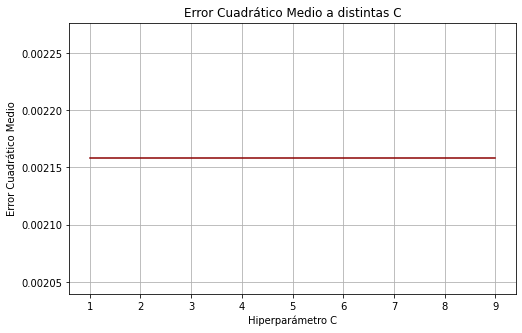

In [ ]:
#VALIDACIÓN CRUZADA PARA KERNEL LINEAL A DISTINTOS HIPERPARÁMETROS C

print("Las variable predictora es: ", caracteristica[0])

# PRUEBA DEL HIPERPARÁMETRO C
cMinimo = 1
cMaximo = 10
cPaso = 1

errorCuadraticoMedioList = []
cs = np.array(range(cMinimo,cMaximo,cPaso))

for c in range(cMinimo,cMaximo,cPaso):
  svr = SVR(kernel = "linear", C = c) 
  svr.fit(X_train,Y_train)
  
  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 150 EN 150, PUES TENEMOS 1500 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(svr, X, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para un HIPERPARÁMETRO C de ", c, " el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(cs, errorCuadraticoMedio, c = "darkred")
plt.plot(2*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintas C")
plt.xlabel("Hiperparámetro C")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(cs)
plt.grid()
plt.show()

Las variable predictora es:  Inercia_Total
Para un hiperparámetro C de  1  el mse es:  0.0021579473623986527
Para un hiperparámetro C de  2  el mse es:  0.0021579473623986527


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  3  el mse es:  0.0021579473623986527
Para un hiperparámetro C de  4  el mse es:  0.0021579473623986527
Para un hiperparámetro C de  5  el mse es:  0.0021579473623986527


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  6  el mse es:  0.0021579473623986527
Para un hiperparámetro C de  7  el mse es:  0.0021579473623986527
Para un hiperparámetro C de  8  el mse es:  0.0021579473623986527


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  9  el mse es:  0.0021579473623986527
Para un hiperparámetro C de  10  el mse es:  0.0021579473623986527


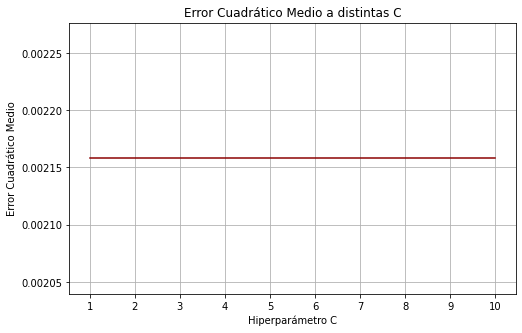

In [ ]:
#VALIDACIÓN CRUZADA PARA KERNEL POLINOMIAL A DISTINTOS HIPERPARÁMETROS C

print("Las variable predictora es: ", caracteristica[0])

# PRUEBA DEL HIPERPARÁMETRO C
cMinimo = 1
cMaximo = 10+1
cPaso = 1

errorCuadraticoMedioList = []
cs = np.array(range(cMinimo,cMaximo,cPaso))

for c in range(cMinimo,cMaximo,cPaso):
  svr = SVR(kernel = "poly", C = c, degree = 2) 
  svr.fit(X_train,Y_train)
  
  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 150 EN 150, PUES TENEMOS 1500 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(svr, X, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para un hiperparámetro C de ", c, " el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(cs, errorCuadraticoMedio, c = "darkred")
plt.plot(5*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintas C")
plt.xlabel("Hiperparámetro C")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(cs)
plt.grid()
plt.show()

Las variable predictora es:  Inercia_Total
Para el polinomio de grado  2  el mse es:  0.0021579473623986527
Para el polinomio de grado  3  el mse es:  0.0021579473623986527


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para el polinomio de grado  4  el mse es:  0.0021579473623986527
Para el polinomio de grado  5  el mse es:  0.0021579473623986527
Para el polinomio de grado  6  el mse es:  0.0021579473623986527


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para el polinomio de grado  7  el mse es:  0.0021579473623986527
Para el polinomio de grado  8  el mse es:  0.0021579473623986527
Para el polinomio de grado  9  el mse es:  0.0021579473623986527


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para el polinomio de grado  10  el mse es:  0.0021579473623986527


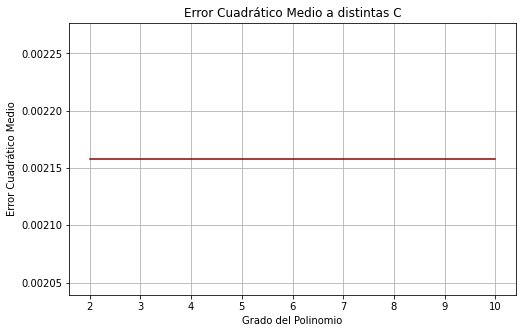

In [ ]:
#VALIDACIÓN CRUZADA PARA KERNEL POLINOMIAL A DISTINTOS GRADOS DEL POLINOMIO

print("Las variable predictora es: ", caracteristica[0])

cAceptado = 10

# PRUEBA DEL HIPERPARÁMETRO C
dMinimo = 2
dMaximo = 10+1
dPaso = 1

errorCuadraticoMedioList = []
ds = np.array(range(dMinimo,dMaximo,dPaso))

for d in range(dMinimo,dMaximo,dPaso):
  svr = SVR(kernel = "poly", C = cAceptado, degree = d) 
  svr.fit(X_train,Y_train)
  
  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 150 EN 150, PUES TENEMOS 1500 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(svr, X, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para el polinomio de grado ", d, " el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(ds, errorCuadraticoMedio, c = "darkred")
plt.plot(2*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintas C")
plt.xlabel("Grado del Polinomio")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(ds)
plt.grid()
plt.show()

Las variable predictora es:  Inercia_Total
Para un hiperparámetro C de  1  el mse es:  0.0021579473623986527
Para un hiperparámetro C de  11  el mse es:  0.0021579473623986527


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  21  el mse es:  0.0021579473623986527
Para un hiperparámetro C de  31  el mse es:  0.0021579473623986527
Para un hiperparámetro C de  41  el mse es:  0.0021579473623986527


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  51  el mse es:  0.0021579473623986527
Para un hiperparámetro C de  61  el mse es:  0.0021579473623986527
Para un hiperparámetro C de  71  el mse es:  0.0021579473623986527


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Para un hiperparámetro C de  81  el mse es:  0.0021579473623986527
Para un hiperparámetro C de  91  el mse es:  0.0021579473623986527


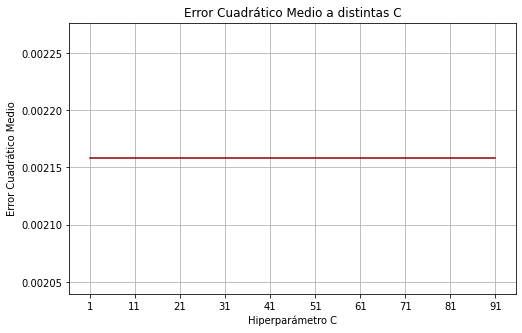

In [ ]:
#VALIDACIÓN CRUZADA PARA KERNEL RBF A DISTINTOS HIPERPARÁMETROS C

print("Las variable predictora es: ", caracteristica[0])

# PRUEBA DEL HIPERPARÁMETRO C
cMinimo = 1
cMaximo = 100+1
cPaso = 10

errorCuadraticoMedioList = []
cs = np.array(range(cMinimo,cMaximo,cPaso))

for c in range(cMinimo,cMaximo,cPaso):
  svr = SVR(kernel = "rbf", C = c, gamma = 0.1) 
  svr.fit(X_train,Y_train)
  
  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 150 EN 150, PUES TENEMOS 1500 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(svr, X, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para un hiperparámetro C de ", c, " el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(cs, errorCuadraticoMedio, c = "darkred")
plt.plot(30*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintas C")
plt.xlabel("Hiperparámetro C")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(cs)
plt.grid()
plt.show()

In [ ]:
kernelAceptado = "poly"
cAceptado = 10
degreeAceptado = 2

In [ ]:
svr = SVR(kernel = kernelAceptado, C = cAceptado, degree = degreeAceptado) 
svr.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=10, degree=2, kernel='poly')

> Validación del SVR
---

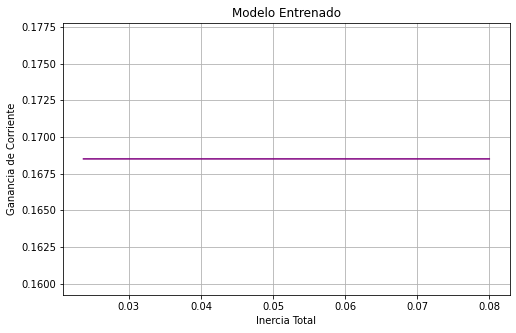

In [ ]:
Y_predtotal = svr.predict(X)
#GRÁFICA DEL MODELO
plt.figure(figsize = (8,5))
plt.plot(X, Y_predtotal, c = "purple")
plt.title("Modelo Entrenado")
plt.xlabel("Inercia Total")
plt.ylabel("Ganancia de Corriente")
plt.grid()
plt.show()

In [ ]:
# ERROR CUADRÁTICO MEDIO
Y_pred = svr.predict(X_test)
MSE = mean_squared_error(Y_test,Y_pred)

# COEFICIENTES DE DETERMINACIÓN R2 SCORE
OOBS = svr.score(X_test,Y_test)
OOBS = OOBS*100

# ERROR ESTÁNDAR RESIDUAL
SSD = np.sum((Y_pred - np.transpose(Y_test.values))**2) #SSD         #DIFERENCIA CUADRADO ENTRE LOS DATOS Y EL RESULTADO PREDICHO
RSE_prev = np.sqrt(SSD/(len(Y_test.values)-len(caracteristica)-1))   #HALLAR ERROR RESPECTO AL PROMEDIO
promedio = np.mean(Y_test.values)
RSE = RSE_prev/promedio

print("El error cuadrático medio es: ", MSE)
print("El coeficiente de Determinación R2 score es: ", OOBS, "%")
print("El error estándar residual es: ", RSE)

El error cuadrático medio es:  0.0021364921344725627
El coeficiente de Determinación R2 score es:  -65.474636801934 %
El error estándar residual es:  0.3326396132409615


> Exportar Modelo de SVR
---

In [ ]:
filenameModelo = "PP_CONTROL_MOTOR_DC/Motor_Regresion_SVM_Corriente.pkl"
fullpathModelo = os.path.join(mainpath,filenameModelo)

joblib.dump(svr,fullpathModelo)

['drive/My Drive/DATASET/PP_CONTROL_MOTOR_DC/Motor_Regresion_SVM_Corriente.pkl']